# Social Media and Online Advertising in European Enterprises


Sample Project in Data Analytics

# Domain


Social Media

# Objective

1. To analyze the use of social media and online advertising by European enterprises.

2. To compare digital media usage based on enterprise size (small, medium, and large).

3. To identify differences in digital adoption across European countries and industries.

#Problem Definition:

•	Social media and online ads are important for business growth.

•	Not all companies use them equally.

•	Enterprise size matters:

 *  Large companies have more money and expertise.

 *  SMEs often struggle with digital adoption.

•	There is a digital gap, and this project identifies it using real European data.




# Outcome

1. Shows how the use of social media and online advertising differs by enterprise size in Europe.

2. Identifies digital gaps between small, medium, and large enterprises.

3. Helps policymakers and businesses improve digital strategies based on the findings.

# Dataset Information

Data is collected from Eurostat.

Sample dataset is available on GigaSheet.

Source: https://www.gigasheet.com/sample-data/social-media-use-by-eurostat

Year/Timeline:11-05-2023

Dataset Column Description:

* DATAFLOW - Dataset identification

* LAST UPDATE - Date of last update

* freq - Frequency of data collection

* size_emp - Size of enterprise

* nace_r2 - Industry classification

* indic_is - Type of digital indicator

* unit - Measurement unit

* Geo - Country or region

* Time-Period - Year of observation

* OBS-value - Observed data value

* OBS-Flag - Data quality information


#Dataset Selection:

**2.1 Data Filtering**

* Use only the latest available year.

* Select enterprises with valid size categories.

* Include only social media and online advertising indicators.

* Focus on European countries only.

**2.2 Purpose of Data Selection**

* Compare digital usage by enterprise size.

* Analyze differences across European countries.

* Study the impact of industry type on digital adoption.

#PySpark Installation and Dataset Download Process

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Pyspark_Implementation").getOrCreate()
spark

In [ ]:
!wget -O eurostat_social_media.csv "https://raw.githubusercontent.com/deepahari7-cell/Social-Media-and-Online-Advertising-in-European-Enterprises-Size-Classified-Insights-by-Eurostat/main/Social%20media%20use%20by%20Eurostat%20export%202025-12-29%2017-31-53.csv"

--2026-01-18 16:55:14--  https://raw.githubusercontent.com/deepahari7-cell/Social-Media-and-Online-Advertising-in-European-Enterprises-Size-Classified-Insights-by-Eurostat/main/Social%20media%20use%20by%20Eurostat%20export%202025-12-29%2017-31-53.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4266083 (4.1M) [text/plain]
Saving to: ‘eurostat_social_media.csv’

eurostat_social_med 100%[===================>]   4.07M  --.-KB/s    in 0.07s   

2026-01-18 16:55:14 (58.0 MB/s) - ‘eurostat_social_media.csv’ saved [4266083/4266083]



In [ ]:
df = spark.read.csv(
    "eurostat_social_media.csv",
    header=True,
    inferSchema=True
)

df.show(5)

+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|            DATAFLOW|     LAST UPDATE|freq|size_emp|     nace_r2|indic_is|       unit|geo|TIME_PERIOD|OBS_VALUE|OBS_FLAG|
+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| ES|       2018|      7.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| PT|       2018|      8.4|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| UK|       2018|     13.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| ES|       2018|     10.1|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| PT|       2018|      9.5|    NULL|
+---------------

In [ ]:
df.printSchema()

root
 |-- DATAFLOW: string (nullable = true)
 |-- LAST UPDATE: string (nullable = true)
 |-- freq: string (nullable = true)
 |-- size_emp: string (nullable = true)
 |-- nace_r2: string (nullable = true)
 |-- indic_is: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- TIME_PERIOD: integer (nullable = true)
 |-- OBS_VALUE: double (nullable = true)
 |-- OBS_FLAG: string (nullable = true)



In [ ]:
df.describe().show()

+-------+--------------------+----------------+-----+--------+------------+------------+----------+-----+------------------+------------------+--------+
|summary|            DATAFLOW|     LAST UPDATE| freq|size_emp|     nace_r2|    indic_is|      unit|  geo|       TIME_PERIOD|         OBS_VALUE|OBS_FLAG|
+-------+--------------------+----------------+-----+--------+------------+------------+----------+-----+------------------+------------------+--------+
|  count|               44455|           44455|44455|   44455|       44455|       44455|     44455|44455|             44455|             44174|     281|
|   mean|                NULL|            NULL| NULL|    NULL|        NULL|        NULL|      NULL| NULL|2016.3346080305928|28.182220310589937|    NULL|
| stddev|                NULL|            NULL| NULL|    NULL|        NULL|        NULL|      NULL| NULL|2.3114540160970654|20.591451807225862|    NULL|
|    min|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|    A|     0-9|C10-S951_X_K|       

In [ ]:
df.sample(0.2).show()

+--------------------+----------------+----+--------+------------+---------+-----------+---+-----------+---------+--------+
|            DATAFLOW|     LAST UPDATE|freq|size_emp|     nace_r2| indic_is|       unit|geo|TIME_PERIOD|OBS_VALUE|OBS_FLAG|
+--------------------+----------------+----+--------+------------+---------+-----------+---+-----------+---------+--------+
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|    E_ADS|     PC_ENT| ES|       2018|      7.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|    E_ADS|PC_ENT_CUSE| PT|       2018|      9.5|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|    E_ADS|PC_ENT_IACC| ES|       2018|     10.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS3|PC_ENT_CUSE| ES|       2018|      6.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|E_ADS_B2C|     PC_ENT| UK|       2018|      3.8|    NULL|
|ESTAT:I

In [ ]:
df.dtypes

[('DATAFLOW', 'string'),
 ('LAST UPDATE', 'string'),
 ('freq', 'string'),
 ('size_emp', 'string'),
 ('nace_r2', 'string'),
 ('indic_is', 'string'),
 ('unit', 'string'),
 ('geo', 'string'),
 ('TIME_PERIOD', 'int'),
 ('OBS_VALUE', 'double'),
 ('OBS_FLAG', 'string')]

In [ ]:
df.columns

['DATAFLOW',
 'LAST UPDATE',
 'freq',
 'size_emp',
 'nace_r2',
 'indic_is',
 'unit',
 'geo',
 'TIME_PERIOD',
 'OBS_VALUE',
 'OBS_FLAG']

In [ ]:
df.show(5)

+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|            DATAFLOW|     LAST UPDATE|freq|size_emp|     nace_r2|indic_is|       unit|geo|TIME_PERIOD|OBS_VALUE|OBS_FLAG|
+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| ES|       2018|      7.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| PT|       2018|      8.4|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| UK|       2018|     13.8|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| ES|       2018|     10.1|    NULL|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| PT|       2018|      9.5|    NULL|
+---------------

#Data Cleaning and Preprocessing

In [ ]:
from pyspark.sql.functions import when, col

In [ ]:
#**Handle missing values**
df.filter(col("OBS_VALUE").isNull()).count()

281

In [ ]:
df.filter(col("OBS_FLAG").isNull()).count()

44174

In [ ]:
df=df.fillna({"OBS_VALUE":df.agg({"OBS_VALUE":"mean"}).first()[0]})

In [ ]:
df.filter(col("OBS_VALUE").isNull()).count()

0

In [ ]:
from pyspark.sql.functions import col, when

from pyspark.sql.functions import col, coalesce, lit

df = df.withColumn(
    "OBS_FLAG",
    coalesce(col("OBS_FLAG"), lit("n"))
)

In [ ]:
df.filter(col("OBS_FLAG").isNull()).count()

0

In [ ]:
df.show()

+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|            DATAFLOW|     LAST UPDATE|freq|size_emp|     nace_r2|indic_is|       unit|geo|TIME_PERIOD|OBS_VALUE|OBS_FLAG|
+--------------------+----------------+----+--------+------------+--------+-----------+---+-----------+---------+--------+
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| ES|       2018|      7.8|       n|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| PT|       2018|      8.4|       n|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|     PC_ENT| UK|       2018|     13.8|       n|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| ES|       2018|     10.1|       n|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|   E_ADS|PC_ENT_CUSE| PT|       2018|      9.5|       n|
|ESTAT:ISOC_CISM

In [ ]:
df.printSchema()

root
 |-- DATAFLOW: string (nullable = true)
 |-- LAST UPDATE: string (nullable = true)
 |-- freq: string (nullable = true)
 |-- size_emp: string (nullable = true)
 |-- nace_r2: string (nullable = true)
 |-- indic_is: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- TIME_PERIOD: integer (nullable = true)
 |-- OBS_VALUE: double (nullable = false)
 |-- OBS_FLAG: string (nullable = false)



In [ ]:
#Convert data types String to Datetime:
from pyspark.sql.functions import to_timestamp

df = df.withColumn(
    "datetime_col",
    to_timestamp("LAST UPDATE", "dd-MM-yyyy HH:mm")
)

df.select("LAST UPDATE", "datetime_col").show(truncate=False)

+----------------+-------------------+
|LAST UPDATE     |datetime_col       |
+----------------+-------------------+
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
|29-08-2023 11:00|2023-08-29 11:00:00|
+----------------+-------------------+
only showing top 20 rows


In [ ]:
df.printSchema()

root
 |-- DATAFLOW: string (nullable = true)
 |-- LAST UPDATE: string (nullable = true)
 |-- freq: string (nullable = true)
 |-- size_emp: string (nullable = true)
 |-- nace_r2: string (nullable = true)
 |-- indic_is: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- TIME_PERIOD: integer (nullable = true)
 |-- OBS_VALUE: double (nullable = false)
 |-- OBS_FLAG: string (nullable = false)
 |-- datetime_col: timestamp (nullable = true)



In [ ]:
#Handle duplicates
df = df.dropDuplicates()

In [ ]:
#Treat outliers:
group_cols = ["size_emp", "indic_is", "unit", "Time_Period"]

In [ ]:
from pyspark.sql import functions as F
iqr_df = (
    df
    .groupBy(group_cols)
    .agg(
        F.expr("percentile_approx(OBS_VALUE, 0.25)").alias("Q1"),
        F.expr("percentile_approx(OBS_VALUE, 0.75)").alias("Q3")
    )
    .withColumn("IQR", F.col("Q3") - F.col("Q1"))
    .withColumn("lower_bound", F.col("Q1") - 1.5 * F.col("IQR"))
    .withColumn("upper_bound", F.col("Q3") + 1.5 * F.col("IQR"))
)

In [ ]:
#join bounds back to main data
df_iqr = df.join(iqr_df, on=group_cols, how="left")

In [ ]:
#dedect outliers
df_iqr = df_iqr.withColumn(
    "is_outlier",
    F.when(
        (F.col("OBS_VALUE") < F.col("lower_bound")) |
        (F.col("OBS_VALUE") > F.col("upper_bound")),
        1
    ).otherwise(0)
)

In [ ]:
#Treat Outliers:


df_clean = df_iqr.withColumn(
    "OBS_VALUE_CLEAN",
    F.when(
        (F.col("OBS_FLAG") == "c"),
        F.col("OBS_VALUE")
    )
    .when(
        (F.col("is_outlier") == 1) & (F.col("OBS_FLAG").isin("n", "u")) &
        (F.col("OBS_VALUE") < F.col("lower_bound")),
        F.col("lower_bound")
    )
    .when(
        (F.col("is_outlier") == 1) & (F.col("OBS_FLAG").isin("n", "u")) &
        (F.col("OBS_VALUE") > F.col("upper_bound")),
        F.col("upper_bound")
    )
    .otherwise(F.col("OBS_VALUE"))
)

In [ ]:
df_final = df_clean.filter(
    ~((F.col("OBS_FLAG") == "u") & (F.col("is_outlier") == 1)))

In [ ]:
df_final = df_final.select(
    "*"
)

In [ ]:
df_clean.select(
    "OBS_VALUE", "is_outlier", "OBS_FLAG", "OBS_VALUE_CLEAN"
).show()

+---------+----------+--------+---------------+
|OBS_VALUE|is_outlier|OBS_FLAG|OBS_VALUE_CLEAN|
+---------+----------+--------+---------------+
|      5.3|         0|       n|            5.3|
|     14.0|         0|       n|           14.0|
|     13.6|         0|       n|           13.6|
|      8.7|         0|       n|            8.7|
|     16.5|         0|       n|           16.5|
|     10.6|         0|       n|           10.6|
|     19.5|         0|       n|           19.5|
|      2.4|         0|       n|            2.4|
|      2.9|         0|       n|            2.9|
|     35.1|         0|       n|           35.1|
|     23.5|         0|       n|           23.5|
|     17.3|         0|       n|           17.3|
|     21.0|         0|       n|           21.0|
|     26.8|         0|       n|           26.8|
|     49.9|         0|       n|           49.9|
|      9.2|         0|       n|            9.2|
|     17.3|         0|       n|           17.3|
|     21.3|         0|       n|         

In [ ]:
df.show()

+--------------------+----------------+----+--------+------------+-------------+-----------+---+-----------+---------+--------+-------------------+
|            DATAFLOW|     LAST UPDATE|freq|size_emp|     nace_r2|     indic_is|       unit|geo|TIME_PERIOD|OBS_VALUE|OBS_FLAG|       datetime_col|
+--------------------+----------------+----+--------+------------+-------------+-----------+---+-----------+---------+--------+-------------------+
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|       E_ADS3|     PC_ENT| ES|       2018|      5.3|       n|2023-08-29 11:00:00|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K| E_SM1_CNTSHR|     PC_ENT| ES|       2021|     14.0|       n|2023-08-29 11:00:00|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|     0-9|C10-S951_X_K|    E_SM1_GE2|PC_ENT_IACC| RO|       2019|     13.6|       n|2023-08-29 11:00:00|
|ESTAT:ISOC_CISMT(...|29-08-2023 11:00|   A|  01-Apr|C10-S951_X_K|    E_ADS_WEB|     PC_ENT| SK|       2016|    

In [ ]:
df_clean.select(
    "OBS_VALUE", "is_outlier", "OBS_FLAG", "OBS_VALUE_CLEAN"
).show(100)

+------------------+----------+--------+------------------+
|         OBS_VALUE|is_outlier|OBS_FLAG|   OBS_VALUE_CLEAN|
+------------------+----------+--------+------------------+
|               5.3|         0|       n|               5.3|
|              14.0|         0|       n|              14.0|
|              13.6|         0|       n|              13.6|
|               8.7|         0|       n|               8.7|
|              16.5|         0|       n|              16.5|
|              10.6|         0|       n|              10.6|
|              19.5|         0|       n|              19.5|
|               2.4|         0|       n|               2.4|
|               2.9|         0|       n|               2.9|
|              35.1|         0|       n|              35.1|
|              23.5|         0|       n|              23.5|
|              17.3|         0|       n|              17.3|
|              21.0|         0|       n|              21.0|
|              26.8|         0|       n|

In [ ]:
#Check skewness

from pyspark.sql import functions as F

df_clean.select(
    F.skewness("OBS_VALUE_CLEAN").alias("skewness")
).show()


+------------------+
|          skewness|
+------------------+
|0.9854532822393934|
+------------------+



In [ ]:
#Skewness by Enterprise Size

df_clean.groupBy("size_emp").agg(
    F.skewness("OBS_VALUE_CLEAN").alias("skewness")
).show()

+--------+------------------+
|size_emp|          skewness|
+--------+------------------+
|  10-249|1.0966797667879558|
|     0-9|1.3776168967913718|
|  01-Sep|2.1846495426666745|
|     0_1|0.8538428302246286|
|  50-249|0.8860111493652087|
|  05-Sep|1.4535699857591295|
|  01-Apr|2.3819469075419106|
|  Oct-49|1.1426924732855597|
|  02-Sep|0.7141724406888865|
|    GE10|1.0837678087854545|
|   GE250|0.5811967027929954|
+--------+------------------+



In [ ]:
#Skewness by Indicator
df_clean.groupBy("indic_is").agg(
    F.skewness("OBS_VALUE_CLEAN").alias("skewness")
).show()

+-------------+-------------------+
|     indic_is|           skewness|
+-------------+-------------------+
|    E_SM_SNET| 0.7618934596371854|
|    E_ADS_B2C| 1.6864024084798692|
|        E_VBU| 0.6532906866886956|
|   E_SM1_BLOG|  1.594967896080059|
| E_SM_POL_GE2| 2.0941984710429313|
|    E_ADS_LOC| 1.1754447469365854|
|E_WEB_SM1_ANY|0.22660836873429785|
|    E_ADS_TRK|  1.287387318699176|
| E_WEB_SM_GE2| 1.4081458776356621|
|      E_SM1_1|0.26946824413101544|
|E_ADS_SM1_ANY|  0.963347195956638|
|     E_SM_GE2| 1.4076248937409899|
|       E_SM_1| 0.5448410602892997|
|    E_SM1_GE2|  1.090866503976959|
|   E_SM1_SNET|0.26907197830097757|
| E_SM1_CNTSHR| 1.2642734003184315|
| E_SM_ANY_ADS| 1.5792027034132676|
|    E_SM_BLOG| 1.8962426828665513|
|    E_SM1_ANY|0.18929883437175823|
|    E_SM1_GE3| 1.4964108962973375|
+-------------+-------------------+
only showing top 20 rows


In [ ]:
#Log transformation
df_clean = df_clean.withColumn(
    "OBS_VALUE_LOG",
    F.log1p("OBS_VALUE_CLEAN"))

In [ ]:
#Square Root Transformation
from pyspark.sql import functions as F

df_clean = df_clean.withColumn(
    "OBS_VALUE_SQRT",
    F.sqrt("OBS_VALUE_CLEAN")
)

In [ ]:
#Inverse Transformation
df_clean = df_clean.withColumn(
    "OBS_VALUE_INV",
    1 / (F.col("OBS_VALUE_CLEAN") + 1)
)

In [ ]:
  #Re-Check Skewness After Transformation
df_clean.select(
    F.skewness("OBS_VALUE_CLEAN").alias("original"),
    F.skewness("OBS_VALUE_LOG").alias("log"),
    F.skewness("OBS_VALUE_SQRT").alias("sqrt")
).show()

+------------------+-------------------+-------------------+
|          original|                log|               sqrt|
+------------------+-------------------+-------------------+
|0.9854532822393934|-0.7798312494050962|0.15852102438322418|
+------------------+-------------------+-------------------+



In [ ]:
#Feature transformations (date parts, derived fields if required for analysis)

from pyspark.sql import functions as F

df_feat = (
    df_clean

    .withColumn("update_year", F.year("datetime_col"))
    .withColumn("update_month", F.month("datetime_col"))

    .withColumn("year", F.col("TIME_PERIOD"))

    .withColumn(
        "size_order",
        F.when(F.col("size_emp") == "Small", 1)
         .when(F.col("size_emp") == "Medium", 2)
         .when(F.col("size_emp") == "Large", 3)
    )
    .withColumn("nace_group", F.substring("nace_r2", 1, 1))
    .withColumn("adoption_flag",F.when(F.col("OBS_VALUE_CLEAN") > 0, 1).otherwise(0))
    .withColumn("high_adoption_flag",F.when(F.col("OBS_VALUE_CLEAN") >= 50, 1).otherwise(0)))


In [ ]:
df_feat.select(
    "datetime_col", "update_year", "update_month",
    "TIME_PERIOD", "year",
    "size_emp", "size_order",
    "nace_r2", "nace_group",
    "adoption_flag", "high_adoption_flag"
).show(5)

+-------------------+-----------+------------+-----------+----+--------+----------+------------+----------+-------------+------------------+
|       datetime_col|update_year|update_month|TIME_PERIOD|year|size_emp|size_order|     nace_r2|nace_group|adoption_flag|high_adoption_flag|
+-------------------+-----------+------------+-----------+----+--------+----------+------------+----------+-------------+------------------+
|2023-08-29 11:00:00|       2023|           8|       2018|2018|     0-9|      NULL|C10-S951_X_K|         C|            1|                 0|
|2023-08-29 11:00:00|       2023|           8|       2021|2021|     0-9|      NULL|C10-S951_X_K|         C|            1|                 0|
|2023-08-29 11:00:00|       2023|           8|       2019|2019|     0-9|      NULL|C10-S951_X_K|         C|            1|                 0|
|2023-08-29 11:00:00|       2023|           8|       2016|2016|  01-Apr|      NULL|C10-S951_X_K|         C|            1|                 0|
|2023-08-29 1

#Types of Analysis

##1. Descriptive Analysis (What is happening?)

**Objective:**

To describe the dataset and show how digital adoption is distributed across enterprises.

**What was done:**

* Reviewed the data structure and columns

* Inspected sample records to understand values

* Handled missing data by:

   *  Filling missing adoption values with the average

   *  Replacing missing flags with “n”

* Removed duplicate records

* Summarized digital adoption by enterprise size, indicator type, and year

* Identified extreme values using the IQR method

* Capped extreme values while keeping confidential data unchanged

* Assessed skewness (most indicators are right-skewed)

* Created additional features (year, sector groupings, adoption indicators)

**Outcome:**

A clean and consistent dataset that clearly illustrates digital adoption patterns across countries, sectors, and enterprise sizes.

##2. Diagnostic Analysis (Why is it happening?)

**Objective:**

To explain differences in digital adoption across enterprise sizes, sectors, and indicators.

**What was done:**

* Examined outliers by enterprise size, indicator, and year

* Analyzed skewness within subgroups to identify uneven adoption patterns

* Grouped industries using NACE sector sections

* Converted enterprise size into an ordered numeric scale

* Created flags for adoption presence and high adoption (≥50%)

**Key insights:**

* Large enterprises show more stable digital adoption

* SMEs exhibit higher variability and volatility

* Some indicators naturally produce extreme but valid values

* Sector-specific characteristics explain many adoption gaps

* Want to keep using GPT-5? Try

# 3.Predictive Analysis(What is likely to happen next?)

**Objective:**

To make the data suitable for forecasting future adoption trends.

**What was done:**

* Reduced skewness using log and square-root transformations

* Extracted time variables (year, month)

* Encoded enterprise size numerically

* Cleaned and transformed adoption values for modeling

**What this enables:**

* Forecasting adoption trends over
* Comparing future adoption across sectors and sizes
* Identifying fast-growing digital indicators

# 4.Prescriptive Analysis(What should be done?)

**Objective:**

To turn insights into practical policy and business recommendations.

**What the analysis supports:**

* Segmenting enterprises by size, sector, and country

* Identifying groups with low or no adoption

* Comparing countries and sectors as benchmarks

* Ensuring results are reliable and unbiased

**Actionable recommendations:**

* Support small and micro enterprises with targeted digital programs

* Design sector-specific digital strategies

* Use high-performing countries as policy models

* Invest in fast-growing digital technologies

##EDA and Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
size_counts = df_feat.groupBy("size_emp").count()

In [ ]:
raw_pd = df_feat.select("size_emp", "adoption_flag").toPandas()

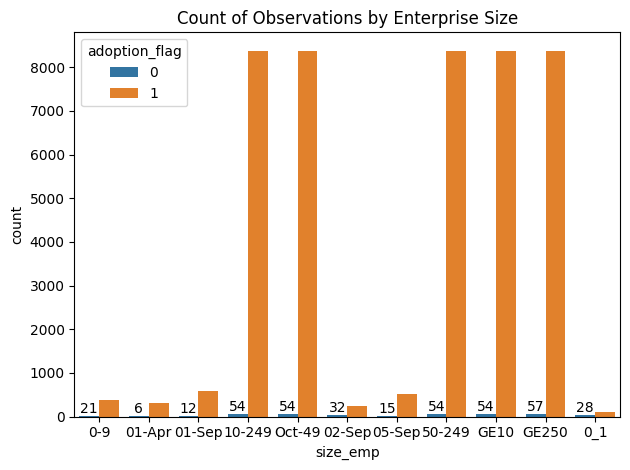

In [ ]:
ax=sns.countplot(data=raw_pd, x="size_emp", hue='adoption_flag')
ax.bar_label(ax.containers[0])
plt.title("Count of Observations by Enterprise Size")
plt.tight_layout()
plt.show()

##Interpretation:
The bar chart illustrates the distribution of adoption across different enterprise size categories, comparing counts for adopted and non-adopted groups.

##Insights:
Adoption is overwhelmingly higher among medium and large enterprises, while smaller firms show minimal adoption, indicating a strong positive relationship between enterprise size and adoption behavior.

In [ ]:
sca_pd = df_feat.select("TIME_PERIOD", "OBS_VALUE","size_emp","geo","nace_r2",'indic_is').toPandas()

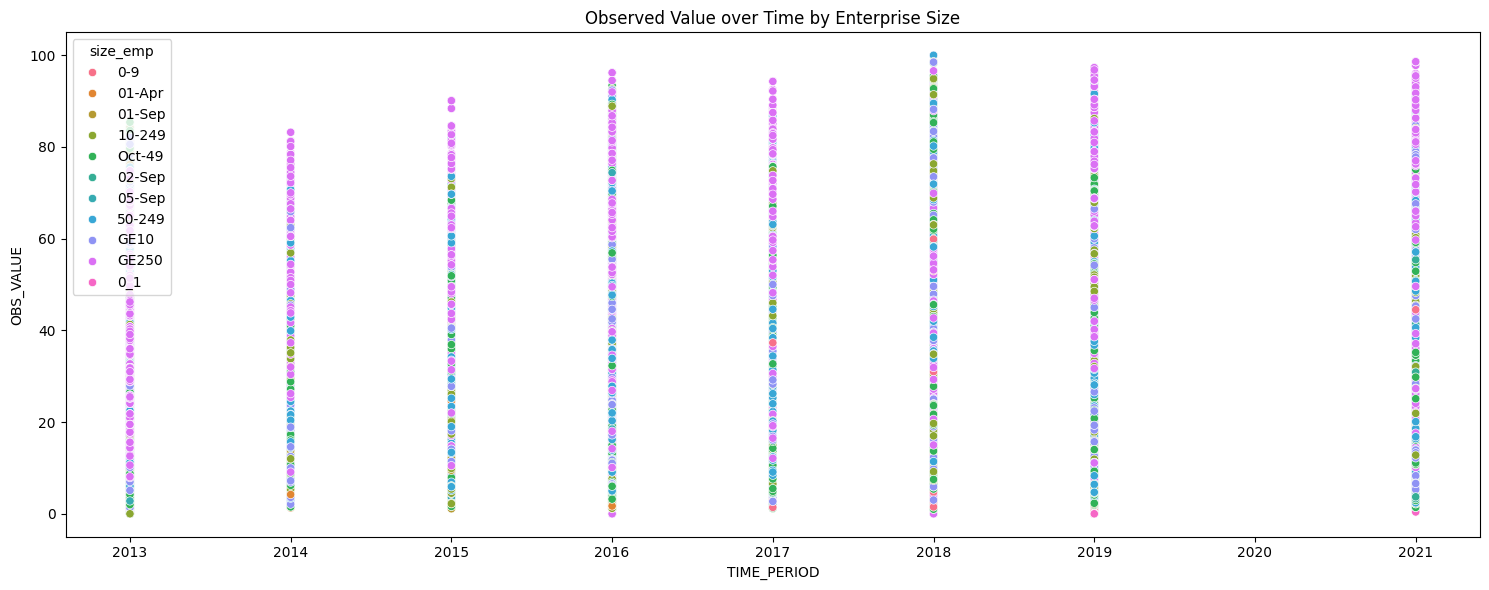

In [ ]:
plt.figure(figsize= (15,6))
sns.scatterplot(data=sca_pd, x='TIME_PERIOD',y='OBS_VALUE',hue='size_emp')
plt.title("Observed Value over Time by Enterprise Size")
plt.tight_layout()
plt.show()

##Interpretation:
The scatter plot shows observed values over time across different enterprise sizes, highlighting how performance or adoption levels evolve from 2013 to 2021.

##Insights:
Observed values generally increase over time for all enterprise sizes, with larger enterprises consistently achieving higher levels, indicating sustained growth and a persistent size-based advantage.

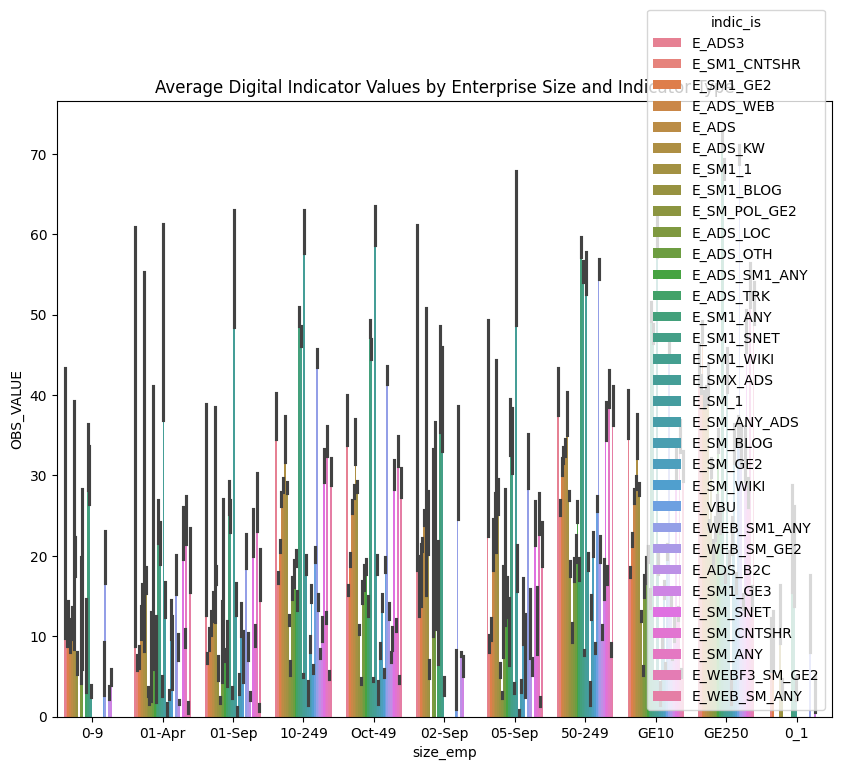

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=sca_pd,x="size_emp", y="OBS_VALUE", hue="indic_is")
plt.title("Average Digital Indicator Values by Enterprise Size and Indicator Type")
plt.show()

##Interpretation:
The bar chart compares average digital indicator values across enterprise sizes and indicator types, showing how digital activities differ by firm size and digital dimension.

##Insights:
Larger enterprises generally record higher values across most digital indicators, while smaller firms lag behind, highlighting a size-driven gap in digital adoption and online activity.

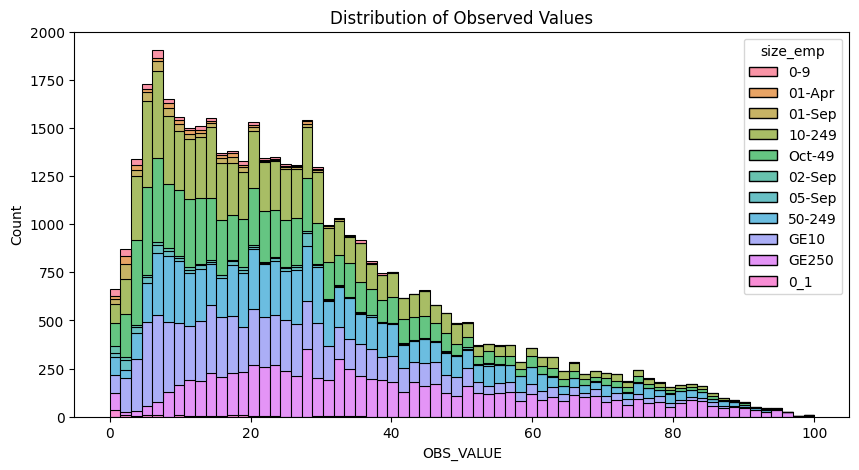

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=sca_pd,x='OBS_VALUE',hue='size_emp',multiple='stack')
plt.title("Distribution of Observed Values")
plt.show()

##Interpretation:
The stacked histogram shows the distribution of digital indicator values across enterprise size classes, highlighting how observations are spread over low to high values.

##Insights:
Smaller enterprises are concentrated at lower digital indicator values, while larger firms contribute more to higher-value ranges, reinforcing the presence of a size-based digital adoption gap.

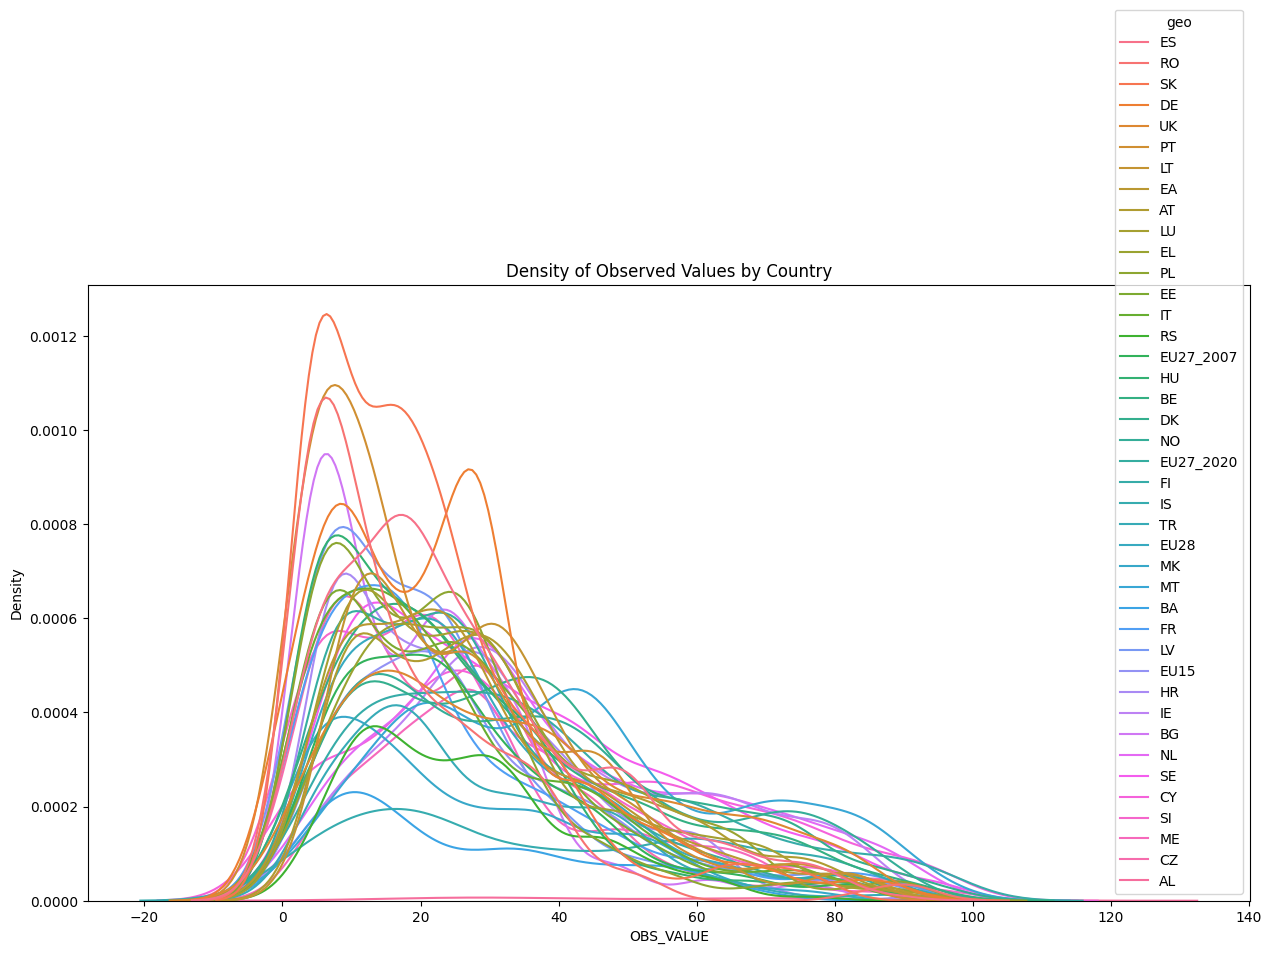

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=sca_pd,x='OBS_VALUE',hue='geo')
plt.title("Density of Observed Values by Country")
plt.show()

##Interpretation:
The density plot shows the distribution of digital indicator values for each country, illustrating where observations are most concentrated.

##Insights:
Countries differ in both typical digital performance levels and dispersion, with some clustered at lower values and others spread toward higher values, indicating uneven digital maturity across countries.

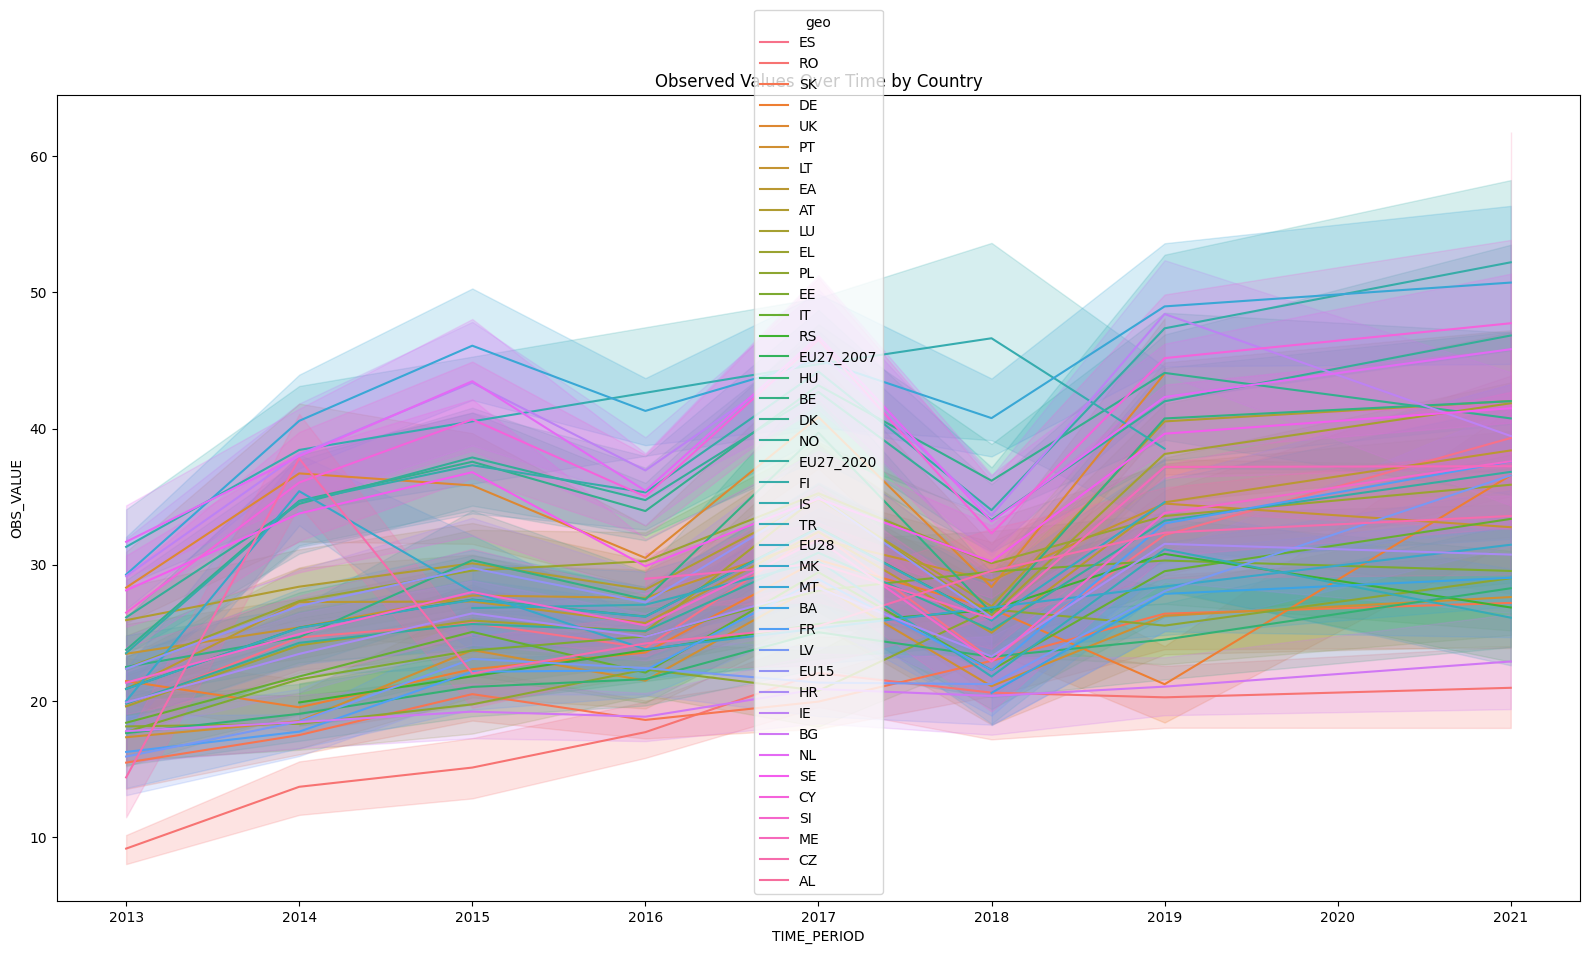

In [ ]:
plt.figure(figsize= (16,10))
sns.lineplot(data=sca_pd, x='TIME_PERIOD', y='OBS_VALUE', hue='geo')
plt.title("Observed Values Over Time by Country")
plt.tight_layout()
plt.show()

##Interpretation:
The line chart shows the trend of digital indicator values over time across countries, illustrating how digital adoption has evolved from 2013 to 2021.

##Insights:
Most countries display an overall upward trend, indicating growing digital adoption, but the levels and growth rates differ, revealing persistent cross-country digital disparities.

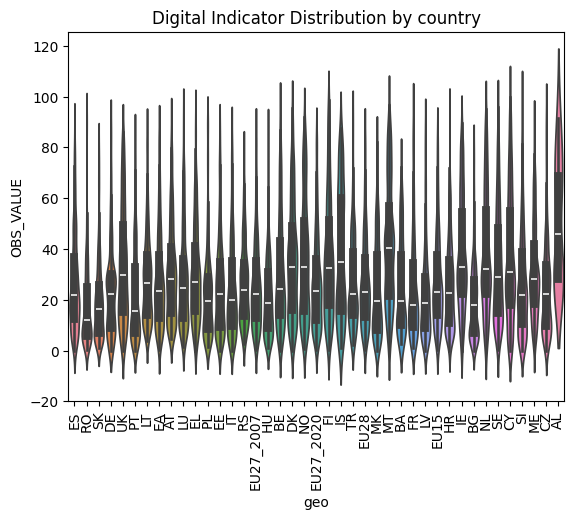

In [ ]:
sns.violinplot(data=sca_pd,x="geo", y="OBS_VALUE",hue="geo")
plt.xticks(rotation=90)
plt.title("Digital Indicator Distribution by country")
plt.show()

##Interpretation:
The violin plot illustrates the distribution of digital indicator values across countries, capturing differences in central tendency and variability.

##Insights:
Some countries show higher and more consistent digital performance, while others exhibit lower values and wider dispersion, indicating uneven digital maturity and cross-country digital inequality.

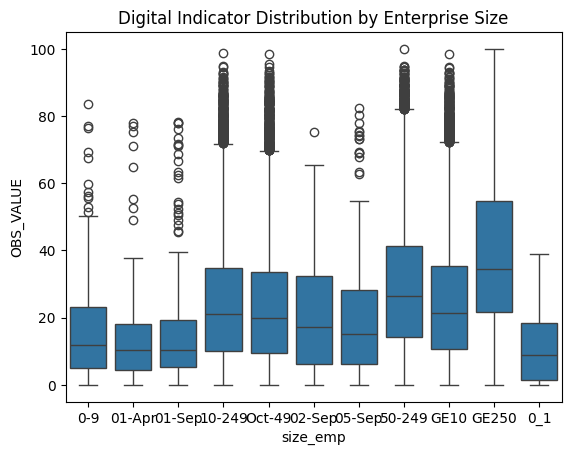

In [ ]:
sns.boxplot(data=sca_pd,x="size_emp", y="OBS_VALUE")
plt.title("Digital Indicator Distribution by Enterprise Size")
plt.show()

##Interpretation:
The box plot shows how digital indicator values vary across enterprise size classes, highlighting differences in median levels, spread, and outliers.

##Insights:
Larger enterprises generally have higher median digital values and greater variability, while smaller firms cluster at lower values, confirming a size-based digital adoption gap.


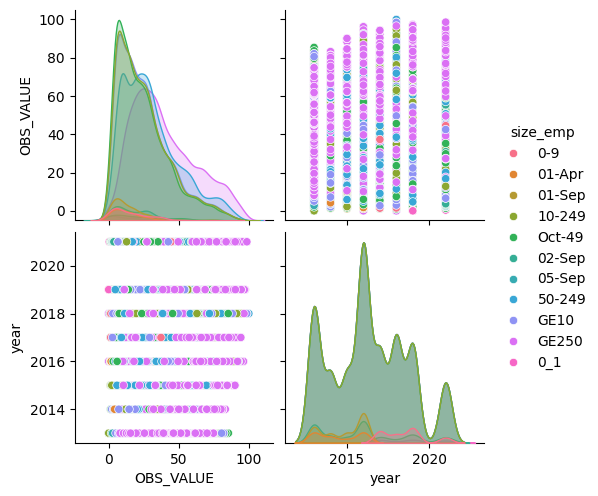

In [ ]:
  sca_pd["year"] = sca_pd["TIME_PERIOD"].astype(int)
  sns.pairplot(sca_pd,vars=["OBS_VALUE", "year"],hue="size_emp")
  plt.show()

##Interpretation:
The pair plot shows the distribution and relationship between digital indicator values and time, segmented by enterprise size, illustrating how digital adoption evolves across years.

##Insights:
Larger enterprises consistently cluster at higher digital indicator values over time, while smaller firms remain concentrated at lower levels, indicating a persistent size-based digital adoption gap.

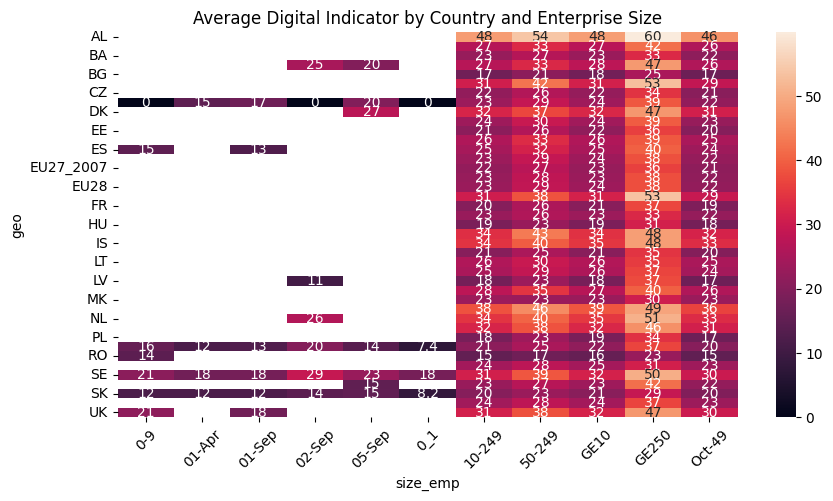

In [ ]:
pivot= sca_pd.pivot_table(values="OBS_VALUE",index="geo",columns="size_emp",aggfunc="mean")
plt.figure  (figsize=(10,5))
sns.heatmap(pivot,annot=True)
plt.xticks(rotation=45)
plt.title("Average Digital Indicator by Country and Enterprise Size")
plt.show()

##Interpretation:
The heat map displays the average digital indicator values across countries and enterprise sizes, showing how digital adoption varies jointly by geography and firm size.

##Insights:
Larger enterprises consistently exhibit higher digital indicator values across most countries, while noticeable cross-country disparities reveal uneven digital maturity and a persistent size-based digital divide.

#Documentation, Insights and Presentation

##Dashboard Section:
pdf Link: https://drive.google.com/file/d/1HbTepkpuCRdrpNxH5HKEBd8Q-mVzVDBv/view?usp=drive_link


##Conclusion:
Digital adoption is rising across enterprises, but large firms lead while SMEs lag behind. Enterprise size matters more than country differences, showing a clear need to support smaller businesses in going digital.

##Future Enhancements:

* Include more recent data to track post-pandemic digital trends.

* Analyze additional digital indicators (e.g., AI use, e-commerce tools).

* Study industry-wise differences in digital adoption.

* Apply predictive analysis to forecast future digital growth.